## 4.3.1 CBOW 모델 구현

In [1]:
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Embedding
from common.negative_sampling_layer import NegativeSamplingLoss


class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')

        # 계층 생성
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)  # Embedding 계층 사용
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)

        # 모든 가중치와 기울기를 배열에 모은다.
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss

    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None

## 4.3.2 CBOW 모델 학습 코드


In [2]:
import tensorflow as tf


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

tf.config.list_physical_devices('GPU')

1 Physical GPUs, 1 Logical GPUs


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 2001 / 9295 | 시간 72[s] | 손실 2.72
| 에폭 1 |  반복 4001 / 9295 | 시간 145[s] | 손실 2.45
| 에폭 1 |  반복 6001 / 9295 | 시간 218[s] | 손실 2.36
| 에폭 1 |  반복 8001 / 9295 | 시간 292[s] | 손실 2.29
| 에폭 2 |  반복 1 / 9295 | 시간 341[s] | 손실 2.24
| 에폭 2 |  반복 2001 / 9295 | 시간 414[s] | 손실 2.16
| 에폭 2 |  반복 4001 / 9295 | 시간 486[s] | 손실 2.12
| 에폭 2 |  반복 6001 / 9295 | 시간 558[s] | 손실 2.08
| 에폭 2 |  반복 8001 / 9295 | 시간 630[s] | 손실 2.05
| 에폭 3 |  반복 1 / 9295 | 시간 677[s] | 손실 2.02
| 에폭 3 |  반복 2001 / 9295 | 시간 749[s] | 손실 1.95
| 에폭 3 |  반복 4001 / 9295 | 시간 824[s] | 손실 1.93
| 에폭 3 |  반복 6001 / 9295 | 시간 897[s] | 손실 1.92
| 에폭 3 |  반복 8001 / 9295 | 시간 970[s] | 손실 1.90
| 에폭 4 |  반복 1 / 9295 | 시간 1017[s] | 손실 1.89
| 에폭 4 |  반복 2001 / 9295 | 시간 1091[s] | 손실 1.82
| 에폭 4 |  반복 4001 / 9295 | 시간 1163[s] | 손실 1.82
| 에폭 4 |  반복 6001 / 9295 | 시간 1236[s] | 손실 1.81
| 에폭 4 |  반복 8001 / 9295 | 시간 1308[s] | 손실 1.80
| 에폭 5 |  반복 1 / 9295 | 시간 1355[s] | 손실 1.79
| 에폭 5 |  반복 2001 / 9295 

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/a

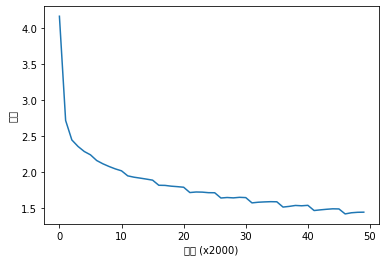

In [4]:
import sys
sys.path.append('..')
import numpy as np
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ===============================================
#config.GPU = True
# ===============================================
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from common.cbow import CBOW
from common.skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습 시작
trainer.fit(contexts, target, max_epoch, batch_size, eval_interval=2000)
trainer.plot()

In [5]:
# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

## 4.3.3 CBOW 모델 평가



In [6]:
import sys
sys.path.append('..')
from common.util import most_similar, analogy
import pickle


pkl_file = 'cbow_params.pkl'
# pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)



[query] you
 i: 0.724609375
 we: 0.72265625
 your: 0.63330078125
 they: 0.61865234375
 someone: 0.5751953125

[query] year
 month: 0.8505859375
 week: 0.7880859375
 summer: 0.75537109375
 spring: 0.734375
 decade: 0.6806640625

[query] car
 cars: 0.61572265625
 truck: 0.59814453125
 auto: 0.591796875
 luxury: 0.5732421875
 window: 0.55224609375

[query] toyota
 honda: 0.63232421875
 seita: 0.6201171875
 nissan: 0.61767578125
 engines: 0.61572265625
 coated: 0.60595703125
--------------------------------------------------

[analogy] king:man = queen:?
 a.m: 7.17578125
 woman: 5.2109375
 wife: 4.7421875
 father: 4.70703125
 daffynition: 4.640625

[analogy] take:took = go:?
 eurodollars: 4.453125
 were: 4.453125
 're: 4.375
 went: 4.37109375
 was: 3.884765625

[analogy] car:cars = child:?
 a.m: 8.46875
 rape: 5.68359375
 daffynition: 5.5
 children: 5.3828125
 bond-equivalent: 5.3046875

[analogy] good:better = bad:?
 rather: 5.91015625
 more: 5.80859375
 less: 5.5546875
 greater: 4.77343